# CATEGORICAL ENCODING

### One Hot Encoding

- One-Hot Encoding is the most common method used to convert categorical data into numerical form — specifically, into binary (0/1) variables — so that machine-learning models can process them.

    - For a categorical variable with k unique categories, OHE creates k new columns (also called dummy variables).
    - Each column represents one possible category.
    - In each row, only one of these columns will have a 1 (indicating presence of that category); all others will have 0.
    
- Makes categorical data numeric, so ML models can use it.
- Works especially well with linear models (like logistic regression or linear regression).
- The encoded columns clearly express which category each record belongs to.

- Limitations
    - High cardinality problem:
        - If a variable has many unique categories (e.g., 100 city names), OHE will create 100 new columns — expanding the dataset significantly.
    - Multicollinearity:
        - Some of the dummy variables are highly correlated (for instance, if “Male” = 0, it automatically means “Female” = 1). To avoid this, one dummy variable is usually dropped (called “drop-first” encoding).

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Load the dataset

data = pd.read_csv('../student_performance_updated_1000.csv')


In [3]:
print("\nDataset Shape:", data.shape)


Dataset Shape: (1000, 12)


In [4]:
data.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [5]:
data.dtypes

StudentID                    float64
Name                          object
Gender                        object
AttendanceRate               float64
StudyHoursPerWeek            float64
PreviousGrade                float64
ExtracurricularActivities    float64
ParentalSupport               object
FinalGrade                   float64
Study Hours                  float64
Attendance (%)               float64
Online Classes Taken          object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [7]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [8]:
# Check unique values for each categorical column
for col in categorical_columns:
    print(f"\n{col}:")
    print(f"  Unique values: {data[col].nunique()}")
    print(f"  Values: {data[col].unique()[:10]}")


Name:
  Unique values: 962
  Values: ['John' 'Sarah' 'Alex' 'Michael' 'Emma' 'Olivia' 'Daniel' 'Sophia' 'James'
 'Isabella']

Gender:
  Unique values: 2
  Values: ['Male' 'Female' nan]

ParentalSupport:
  Unique values: 3
  Values: ['High' 'Medium' 'Low' nan]

Online Classes Taken:
  Unique values: 2
  Values: [False True nan]


In [9]:
# ============================================================================
# METHOD 1: PANDAS GET_DUMMIES (EASIEST APPROACH)
# ============================================================================

data1 = data.copy()

# Example 1: Encoding 'Gender' variable - CORRECT WAY
print("\n--- Example 1: Encoding 'Gender' with 1 and 0 ---")
print("\nOriginal Gender column (first 10 rows):")
print(data1['Gender'].head(10))

# METHOD A: Using dtype parameter in get_dummies()
print("\n✓ CORRECT: Using dtype=int parameter:")
gender_dummies_int = pd.get_dummies(data1['Gender'], dtype=int)
print(gender_dummies_int.head(10))
print(f"\nData type: {gender_dummies_int.dtypes[0]}")

# Show comparison with original
print("\n✓ Side-by-side comparison:")
gender_comparison = pd.concat([data1['Gender'], gender_dummies_int], axis=1)
print(gender_comparison.head(10))

# Getting k-1 dummy variables with dtype=int
print("\n✓ k-1 dummy variables (drop_first=True) with dtype=int:")
gender_dummies_k_minus_1 = pd.get_dummies(data1['Gender'], drop_first=True, dtype=int)
print(gender_dummies_k_minus_1.head(10))
print(f"Data type: {gender_dummies_k_minus_1.dtypes[0]}")

# Example 2: Encoding 'ParentalSupport' variable
print("\n--- Example 2: Encoding 'ParentalSupport' with 1 and 0 ---")
print("\nOriginal ParentalSupport column (first 10 rows):")
print(data1['ParentalSupport'].head(10))

print("\nUnique values in ParentalSupport:")
print(data1['ParentalSupport'].unique())

print("\n✓ All dummy variables with dtype=int:")
support_dummies = pd.get_dummies(data1['ParentalSupport'], dtype=int)
print(support_dummies.head(10))

print("\n✓ k-1 dummy variables with dtype=int:")
support_dummies_k_minus_1 = pd.get_dummies(data1['ParentalSupport'], drop_first=True, dtype=int)
print(support_dummies_k_minus_1.head(10))

# Example 3: Encoding 'Online Classes Taken'
print("\n--- Example 3: Encoding 'Online Classes Taken' with 1 and 0 ---")
print("\nOriginal 'Online Classes Taken' column (first 10 rows):")
print(data1['Online Classes Taken'].head(10))

print("\n✓ One-Hot Encoding with k-1 dummy variables:")
online_dummies = pd.get_dummies(data1['Online Classes Taken'], drop_first=True, dtype=int)
print(online_dummies.head(10))



--- Example 1: Encoding 'Gender' with 1 and 0 ---

Original Gender column (first 10 rows):
0      Male
1    Female
2      Male
3      Male
4    Female
5    Female
6      Male
7    Female
8      Male
9    Female
Name: Gender, dtype: object

✓ CORRECT: Using dtype=int parameter:
   Female  Male
0       0     1
1       1     0
2       0     1
3       0     1
4       1     0
5       1     0
6       0     1
7       1     0
8       0     1
9       1     0

Data type: int64

✓ Side-by-side comparison:
   Gender  Female  Male
0    Male       0     1
1  Female       1     0
2    Male       0     1
3    Male       0     1
4  Female       1     0
5  Female       1     0
6    Male       0     1
7  Female       1     0
8    Male       0     1
9  Female       1     0

✓ k-1 dummy variables (drop_first=True) with dtype=int:
   Male
0     1
1     0
2     1
3     1
4     0
5     0
6     1
7     0
8     1
9     0
Data type: int64

--- Example 2: Encoding 'ParentalSupport' with 1 and 0 ---

Original Par

In [10]:
online_dummies.head()

,True
0,0
1,1
2,0
3,0
4,1


In [11]:
# ============================================================================
# ENCODING ALL CATEGORICAL VARIABLES WITH dtype=int
# ============================================================================
print("\n--- Encoding ALL Categorical Variables with dtype=int ---")

# Select columns (excluding identifiers)
columns_to_keep = [col for col in data1.columns if col not in ['StudentID', 'Name']]
data_for_encoding = data1[columns_to_keep].copy()

print("\n✓ Applying get_dummies() with dtype=int:")
data_encoded_correct = pd.get_dummies(data_for_encoding, drop_first=True, dtype=int)

print(f"\nOriginal shape: {data_for_encoding.shape}")
print(f"Encoded shape: {data_encoded_correct.shape}")



--- Encoding ALL Categorical Variables with dtype=int ---

✓ Applying get_dummies() with dtype=int:

Original shape: (1000, 10)
Encoded shape: (1000, 11)


In [12]:
data_encoded_correct.head(10)


,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%),Gender_Male,ParentalSupport_Low,ParentalSupport_Medium,Online Classes Taken_True
0,85.0,15.0,78.0,1.0,80.0,4.8,59.0,1,0,0,0
1,90.0,20.0,85.0,2.0,87.0,2.2,70.0,0,0,1,1
2,78.0,10.0,65.0,0.0,68.0,4.6,92.0,1,1,0,0
3,92.0,25.0,90.0,3.0,92.0,2.9,96.0,1,0,0,0
4,NaN,18.0,82.0,2.0,85.0,4.1,97.0,0,0,1,1
5,95.0,30.0,88.0,1.0,NaN,2.8,97.0,0,0,0,0
6,70.0,8.0,60.0,0.0,62.0,4.5,96.0,1,1,0,0
7,NaN,17.0,77.0,1.0,78.0,1.0,70.0,0,0,1,1
8,82.0,12.0,70.0,2.0,72.0,3.6,50.0,1,1,0,0
9,91.0,22.0,86.0,3.0,88.0,2.9,59.0,0,0,0,1


In [13]:
# Verify data types are integers
data_encoded_correct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AttendanceRate             960 non-null    float64
 1   StudyHoursPerWeek          950 non-null    float64
 2   PreviousGrade              967 non-null    float64
 3   ExtracurricularActivities  957 non-null    float64
 4   FinalGrade                 960 non-null    float64
 5   Study Hours                976 non-null    float64
 6   Attendance (%)             959 non-null    float64
 7   Gender_Male                1000 non-null   int64  
 8   ParentalSupport_Low        1000 non-null   int64  
 9   ParentalSupport_Medium     1000 non-null   int64  
 10  Online Classes Taken_True  1000 non-null   int64  
dtypes: float64(7), int64(4)
memory usage: 86.1 KB


In [14]:
data_encoded_correct.head()

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%),Gender_Male,ParentalSupport_Low,ParentalSupport_Medium,Online Classes Taken_True
0,85.0,15.0,78.0,1.0,80.0,4.8,59.0,1,0,0,0
1,90.0,20.0,85.0,2.0,87.0,2.2,70.0,0,0,1,1
2,78.0,10.0,65.0,0.0,68.0,4.6,92.0,1,1,0,0
3,92.0,25.0,90.0,3.0,92.0,2.9,96.0,1,0,0,0
4,NaN,18.0,82.0,2.0,85.0,4.1,97.0,0,0,1,1


In [15]:
# ============================================================================
# ALTERNATIVE METHOD: Converting Boolean to Integer
# ============================================================================

# Create boolean dummies first (the default behavior)
gender_bool = pd.get_dummies(data1['Gender'], drop_first=True)
print("\nBoolean dummy variables:")
print(gender_bool.head(10))
print(f"Data type: {gender_bool.dtypes[0]}")

# Convert to integer
gender_int = gender_bool.astype(int)
print("\n✓ Converted to integer:")
print(gender_int.head(10))
print(f"Data type: {gender_int.dtypes[0]}")



Boolean dummy variables:
    Male
0   True
1  False
2   True
3   True
4  False
5  False
6   True
7  False
8   True
9  False
Data type: bool

✓ Converted to integer:
   Male
0     1
1     0
2     1
3     1
4     0
5     0
6     1
7     0
8     1
9     0
Data type: int64


In [16]:
# Determine which parameter to use
import sklearn
version_parts = sklearn.__version__.split('.')
major = int(version_parts[0])
minor = int(version_parts[1])

if major > 1 or (major == 1 and minor >= 2):
    USE_NEW_SYNTAX = True
    print(f"✓ Using NEW syntax: sparse_output=False")
else:
    USE_NEW_SYNTAX = False
    print(f"✓ Using OLD syntax: sparse=False")

✓ Using NEW syntax: sparse_output=False


In [17]:
# ============================================================================
# METHOD 2: SCIKIT-LEARN (BACKWARD COMPATIBLE)
# ============================================================================


# Prepare data
string_categorical = ['Gender', 'ParentalSupport', 'Online Classes Taken']
data_sklearn = data[columns_to_keep].copy()

print("\n--- Step 1: Label Encoding (Required for scikit-learn) ---")
label_encoders = {}
for col in string_categorical:
    if col in data_sklearn.columns:
        data_sklearn[col] = data_sklearn[col].fillna('Missing')
        le = LabelEncoder()
        data_sklearn[col] = le.fit_transform(data_sklearn[col].astype(str))
        label_encoders[col] = le
        print(f"\n{col}: {dict(list(zip(le.classes_, le.transform(le.classes_)))[:5])}")

print("\n--- Step 2: One-Hot Encoding ---")

# Create OneHotEncoder with correct parameter based on version
if USE_NEW_SYNTAX:
    try:
        ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
        print("✓ Using sparse_output=False (new syntax)")
    except:
        # Fallback just in case
        ohe = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
        print("✓ Using sparse=False (old syntax - fallback)")
else:
    ohe = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
    print("✓ Using sparse=False (old syntax)")

# Fit and transform
encoded_array = ohe.fit_transform(data_sklearn[string_categorical])
feature_names = ohe.get_feature_names_out(string_categorical)

print(f"\nEncoded array shape: {encoded_array.shape}")
print(f"Feature names: {list(feature_names)}")

# Create dataframe
encoded_df = pd.DataFrame(encoded_array, columns=feature_names, index=data_sklearn.index)

# Combine with numerical features
numerical_cols = [col for col in data_sklearn.columns if col not in string_categorical]
data_final_sklearn = pd.concat([data_sklearn[numerical_cols], encoded_df], axis=1)



--- Step 1: Label Encoding (Required for scikit-learn) ---

Gender: {'Female': 0, 'Male': 1, 'Missing': 2}

ParentalSupport: {'High': 0, 'Low': 1, 'Medium': 2, 'Missing': 3}

Online Classes Taken: {'False': 0, 'Missing': 1, 'True': 2}

--- Step 2: One-Hot Encoding ---
✓ Using sparse_output=False (new syntax)

Encoded array shape: (1000, 7)
Feature names: ['Gender_1', 'Gender_2', 'ParentalSupport_1', 'ParentalSupport_2', 'ParentalSupport_3', 'Online Classes Taken_1', 'Online Classes Taken_2']


In [18]:
data_final_sklearn.head(10)

,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%),Gender_1,Gender_2,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,Online Classes Taken_1,Online Classes Taken_2
0,85.0,15.0,78.0,1.0,80.0,4.8,59.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,90.0,20.0,85.0,2.0,87.0,2.2,70.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,78.0,10.0,65.0,0.0,68.0,4.6,92.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,92.0,25.0,90.0,3.0,92.0,2.9,96.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,18.0,82.0,2.0,85.0,4.1,97.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,95.0,30.0,88.0,1.0,NaN,2.8,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,70.0,8.0,60.0,0.0,62.0,4.5,96.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,NaN,17.0,77.0,1.0,78.0,1.0,70.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,82.0,12.0,70.0,2.0,72.0,3.6,50.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,91.0,22.0,86.0,3.0,88.0,2.9,59.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
# ============================================================================
# METHOD 3: COLUMN TRANSFORMER (MOST FLEXIBLE)
# ============================================================================

data_ct = data[columns_to_keep].copy() # columns without studentID and Name

# Handle missing values and label encode
for col in string_categorical:    # only selecting the categorical columns (string)
    if col in data_ct.columns:
        data_ct[col] = data_ct[col].fillna('Missing')
        le = LabelEncoder()
        data_ct[col] = le.fit_transform(data_ct[col].astype(str))

# Create the encoder with correct parameter
if USE_NEW_SYNTAX:
    try:
        encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    except:
        encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
else:
    encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

# Create ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ('ohe', encoder, string_categorical)
    ],
    remainder='passthrough'
)

# Transform
data_transformed = ct.fit_transform(data_ct)

# Get feature names
ohe_features = ct.named_transformers_['ohe'].get_feature_names_out(string_categorical) # Returns array like: ['Gender_1', 'Gender_2', 'ParentalSupport_1', 'ParentalSupport_2', ...]
other_features = [col for col in data_ct.columns if col not in string_categorical] # Result: ['AttendanceRate', 'StudyHoursPerWeek', 'Age', 'Salary', ...]
all_features = list(ohe_features) + other_features # Result: Complete list of all column names in order

# Create dataframe
data_final_ct = pd.DataFrame(data_transformed, columns=all_features, index=data_ct.index)



In [20]:
data_final_ct.head(10)

,Gender_1,Gender_2,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,Online Classes Taken_1,Online Classes Taken_2,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,15.0,78.0,1.0,80.0,4.8,59.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,90.0,20.0,85.0,2.0,87.0,2.2,70.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,78.0,10.0,65.0,0.0,68.0,4.6,92.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,25.0,90.0,3.0,92.0,2.9,96.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,18.0,82.0,2.0,85.0,4.1,97.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0,30.0,88.0,1.0,NaN,2.8,97.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,70.0,8.0,60.0,0.0,62.0,4.5,96.0
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,17.0,77.0,1.0,78.0,1.0,70.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,82.0,12.0,70.0,2.0,72.0,3.6,50.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,91.0,22.0,86.0,3.0,88.0,2.9,59.0


Scikit-learn's one hot encoder class only takes numerical categorical values. So, any value of string type should be label encoded first before one hot encoded.

In the titanic example, the gender of the passengers has to be label encoded first before being one-hot encoded using Scikit-learn's one hot encoder class.

### Count and frequency encoding

- In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the colour blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome.

- This approach is heavily used in Kaggle competitions, wherein we replace each label of the categorical variable by the count, this is the amount of times each label appears in the dataset. Or the frequency, this is the percentage of observations within that category. The two methods are equivalent.

In [21]:
data2 = data.copy()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
data2.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [25]:
categorical_cols = data2.select_dtypes(include=['object', 'bool']).columns.tolist()


In [26]:
categorical_cols = [col for col in categorical_cols if col not in ['Name', 'StudentID']]


In [27]:
print(f"\nCategorical variables found: {categorical_cols}")



Categorical variables found: ['Gender', 'ParentalSupport', 'Online Classes Taken']


In [28]:
print("\nUnique values in each categorical variable:")
for col in categorical_cols:
    unique_vals = data2[col].unique()
    print(f"\n{col}:")
    print(f"  - Number of unique values: {len(unique_vals)}")
    print(f"  - Values: {unique_vals}")
    print(f"  - Value counts:")
    print(data2[col].value_counts())



Unique values in each categorical variable:

Gender:
  - Number of unique values: 3
  - Values: ['Male' 'Female' nan]
  - Value counts:
Gender
Male      501
Female    451
Name: count, dtype: int64

ParentalSupport:
  - Number of unique values: 4
  - Values: ['High' 'Medium' 'Low' nan]
  - Value counts:
ParentalSupport
High      345
Medium    328
Low       305
Name: count, dtype: int64

Online Classes Taken:
  - Number of unique values: 3
  - Values: [False True nan]
  - Value counts:
Online Classes Taken
True     495
False    480
Name: count, dtype: int64


In [29]:
# let's select relevant features for encoding
# We'll focus on the categorical variables
features_to_encode = categorical_cols.copy()

In [30]:
# Drop rows with missing values in the target variable (FinalGrade)
df_clean = data2.dropna(subset=['FinalGrade'])
print(f"\nDataset shape after removing rows with missing FinalGrade: {df_clean.shape}")



Dataset shape after removing rows with missing FinalGrade: (960, 12)


In [31]:
# Create feature set and target
X = df_clean[features_to_encode].copy()
y = df_clean['FinalGrade']


In [32]:
# Split into train and test sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [33]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (672, 3)
Test set shape: (288, 3)


In [34]:
# Original data before encoding
print(X_train.head(10))

     Gender ParentalSupport Online Classes Taken
243  Female          Medium                 True
336  Female            High                False
747  Female            High                False
227  Female             Low                 True
83   Female          Medium                 True
158    Male            High                False
312    Male            High                 True
823  Female          Medium                 True
326    Male            High                False
460    Male            High                False


In [35]:
# Create copies for count encoding
X_train_count = X_train.copy()
X_test_count = X_test.copy()

In [36]:
# Dictionary to store count mappings for each variable
count_maps = {}

In [37]:
for col in features_to_encode:
    print(f"\n--- Processing variable: {col} ---")
    
    # Calculate counts for each category in training set
    count_map = X_train[col].value_counts().to_dict()
    count_maps[col] = count_map
    
    print(f"\nCount mapping for {col}:")
    for category, count in sorted(count_map.items(), key=lambda x: x[1], reverse=True):
        print(f"  '{category}' appears {count} times")
    
    # Apply count encoding to both train and test sets
    X_train_count[col] = X_train[col].map(count_map)
    X_test_count[col] = X_test[col].map(count_map)
    
    # Handle any unseen categories in test set (replace with 0)
    X_test_count[col] = X_test_count[col].fillna(0)
    
    print(f"\nAfter count encoding for {col}:")
    print(f"  Training set - min: {X_train_count[col].min()}, max: {X_train_count[col].max()}")
    print(f"  Test set - min: {X_test_count[col].min()}, max: {X_test_count[col].max()}")



--- Processing variable: Gender ---

Count mapping for Gender:
  'Male' appears 348 times
  'Female' appears 293 times

After count encoding for Gender:
  Training set - min: 293.0, max: 348.0
  Test set - min: 0.0, max: 348.0

--- Processing variable: ParentalSupport ---

Count mapping for ParentalSupport:
  'High' appears 232 times
  'Medium' appears 227 times
  'Low' appears 196 times

After count encoding for ParentalSupport:
  Training set - min: 196.0, max: 232.0
  Test set - min: 0.0, max: 232.0

--- Processing variable: Online Classes Taken ---

Count mapping for Online Classes Taken:
  'True' appears 330 times
  'False' appears 325 times

After count encoding for Online Classes Taken:
  Training set - min: 325.0, max: 330.0
  Test set - min: 0.0, max: 330.0


In [38]:
print("\nFirst 10 rows after COUNT ENCODING:")
print(X_train_count.head(10))


First 10 rows after COUNT ENCODING:
     Gender  ParentalSupport  Online Classes Taken
243   293.0            227.0                 330.0
336   293.0            232.0                 325.0
747   293.0            232.0                 325.0
227   293.0            196.0                 330.0
83    293.0            227.0                 330.0
158   348.0            232.0                 325.0
312   348.0            232.0                 330.0
823   293.0            227.0                 330.0
326   348.0            232.0                 325.0
460   348.0            232.0                 325.0


In [39]:
# Create copies for frequency encoding
X_train_freq = X_train.copy()
X_test_freq = X_test.copy()

In [40]:
# Dictionary to store frequency mappings for each variable
frequency_maps = {}

In [41]:
total_observations = len(X_train)


In [42]:
for col in features_to_encode:
    print(f"\n--- Processing variable: {col} ---")
    
    # Calculate frequencies for each category in training set
    value_counts = X_train[col].value_counts()
    frequency_map = (value_counts / total_observations).to_dict()
    frequency_maps[col] = frequency_map
    
    print(f"\nFrequency mapping for {col}:")
    for category, freq in sorted(frequency_map.items(), key=lambda x: x[1], reverse=True):
        print(f"  '{category}' has frequency {freq:.4f} ({freq*100:.2f}%)")
    
    # Apply frequency encoding to both train and test sets
    X_train_freq[col] = X_train[col].map(frequency_map)
    X_test_freq[col] = X_test[col].map(frequency_map)
    
    # Handle any unseen categories in test set (replace with 0)
    X_test_freq[col] = X_test_freq[col].fillna(0)
    
    print(f"\nAfter frequency encoding for {col}:")
    print(f"  Training set - min: {X_train_freq[col].min():.4f}, max: {X_train_freq[col].max():.4f}")
    print(f"  Test set - min: {X_test_freq[col].min():.4f}, max: {X_test_freq[col].max():.4f}")



--- Processing variable: Gender ---

Frequency mapping for Gender:
  'Male' has frequency 0.5179 (51.79%)
  'Female' has frequency 0.4360 (43.60%)

After frequency encoding for Gender:
  Training set - min: 0.4360, max: 0.5179
  Test set - min: 0.0000, max: 0.5179

--- Processing variable: ParentalSupport ---

Frequency mapping for ParentalSupport:
  'High' has frequency 0.3452 (34.52%)
  'Medium' has frequency 0.3378 (33.78%)
  'Low' has frequency 0.2917 (29.17%)

After frequency encoding for ParentalSupport:
  Training set - min: 0.2917, max: 0.3452
  Test set - min: 0.0000, max: 0.3452

--- Processing variable: Online Classes Taken ---

Frequency mapping for Online Classes Taken:
  'True' has frequency 0.4911 (49.11%)
  'False' has frequency 0.4836 (48.36%)

After frequency encoding for Online Classes Taken:
  Training set - min: 0.4836, max: 0.4911
  Test set - min: 0.0000, max: 0.4911


In [43]:
print("\nFirst 10 rows after FREQUENCY ENCODING:")
print(X_train_freq.head(10))


First 10 rows after FREQUENCY ENCODING:
       Gender  ParentalSupport  Online Classes Taken
243  0.436012         0.337798              0.491071
336  0.436012         0.345238              0.483631
747  0.436012         0.345238              0.483631
227  0.436012         0.291667              0.491071
83   0.436012         0.337798              0.491071
158  0.517857         0.345238              0.483631
312  0.517857         0.345238              0.491071
823  0.436012         0.337798              0.491071
326  0.517857         0.345238              0.483631
460  0.517857         0.345238              0.483631


In [44]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Index': X_train.head(10).index,
})

for col in features_to_encode:
    comparison_df[f'{col}_Original'] = X_train[col].head(10).values
    comparison_df[f'{col}_Count'] = X_train_count[col].head(10).values
    comparison_df[f'{col}_Frequency'] = X_train_freq[col].head(10).values


In [45]:
print("\nSide-by-side comparison (first 10 rows):")
print(comparison_df.to_string())


Side-by-side comparison (first 10 rows):
   Index Gender_Original  Gender_Count  Gender_Frequency ParentalSupport_Original  ParentalSupport_Count  ParentalSupport_Frequency Online Classes Taken_Original  Online Classes Taken_Count  Online Classes Taken_Frequency
0    243          Female         293.0          0.436012                   Medium                  227.0                   0.337798                          True                       330.0                        0.491071
1    336          Female         293.0          0.436012                     High                  232.0                   0.345238                         False                       325.0                        0.483631
2    747          Female         293.0          0.436012                     High                  232.0                   0.345238                         False                       325.0                        0.483631
3    227          Female         293.0          0.436012              

### Ordinal Encoding

This is the method used to convert categorical variables into numerical values- but only when the categories have a meaningful order.

example:

['Low','Medium','High']

Low - 1
Medium - 2 
High - 3

Similarly: student grades, Educational levels, cancer stages etc.


In [46]:
data3 = data.copy()

In [47]:
categorical_cols = data3.select_dtypes(include=['object', 'bool']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['Name', 'StudentID']]


In [48]:
print(f"\nCategorical variables: {categorical_cols}")

for col in categorical_cols:
    unique_vals = data3[col].unique()
    print(f"\n{col}:")
    print(f"  - Unique values: {unique_vals}")
    print(f"  - Value counts:")
    print(data3[col].value_counts())


Categorical variables: ['Gender', 'ParentalSupport', 'Online Classes Taken']

Gender:
  - Unique values: ['Male' 'Female' nan]
  - Value counts:
Gender
Male      501
Female    451
Name: count, dtype: int64

ParentalSupport:
  - Unique values: ['High' 'Medium' 'Low' nan]
  - Value counts:
ParentalSupport
High      345
Medium    328
Low       305
Name: count, dtype: int64

Online Classes Taken:
  - Unique values: [False True nan]
  - Value counts:
Online Classes Taken
True     495
False    480
Name: count, dtype: int64


In [49]:
# Define ordinal variables with their natural ordering
ordinal_mappings = {
    'ParentalSupport': ['Low', 'Medium', 'High'],  # Natural order
    'Online Classes Taken': [False, True]           # Binary order
}


In [50]:
print("Defined ordinal mappings:")
for col, order in ordinal_mappings.items():
    print(f"\n{col}:")
    print(f"  Natural order: {' < '.join(map(str, order))}")


Defined ordinal mappings:

ParentalSupport:
  Natural order: Low < Medium < High

Online Classes Taken:
  Natural order: False < True


In [51]:

# ============================================================================
# DATA PREPARATION
# ============================================================================

# Remove rows with missing target
df_clean = data3.dropna(subset=['FinalGrade'])
print(f"\nDataset after removing missing FinalGrade: {df_clean.shape}")

# Select ordinal columns for encoding
ordinal_cols = list(ordinal_mappings.keys())
print(f"Ordinal columns to encode: {ordinal_cols}")

# Create feature set and target
X = df_clean[ordinal_cols].copy()
y = df_clean['FinalGrade']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Dataset after removing missing FinalGrade: (960, 12)
Ordinal columns to encode: ['ParentalSupport', 'Online Classes Taken']


In [52]:
X_train.shape

(672, 2)

In [53]:
X_test.shape

(288, 2)

In [54]:
X_train.head(10)

,ParentalSupport,Online Classes Taken
243,Medium,True
336,High,False
747,High,False
227,Low,True
83,Medium,True
158,High,False
312,High,True
823,Medium,True
326,High,False
460,High,False


In [55]:
# ============================================================================
# METHOD 1: ARBITRARY ORDINAL ENCODING
# ============================================================================

# Create copies for arbitrary encoding
X_train_arbitrary = X_train.copy()
X_test_arbitrary = X_test.copy()

# Store mappings
arbitrary_maps = {}


In [56]:
for col in ordinal_cols:
    print(f"\n--- Encoding {col} ---")
    
    # Create mapping: assign integers starting from 1 (or 0 for boolean)
    categories = ordinal_mappings[col]
    
    if col == 'Online Classes Taken':
        # For boolean, use 0 and 1
        mapping = {categories[0]: 0, categories[1]: 1}
    else:
        # For other ordinal, use 1, 2, 3, ...
        mapping = {cat: idx + 1 for idx, cat in enumerate(categories)}
    
    arbitrary_maps[col] = mapping
    
    print(f"\nArbitrary mapping for {col}:")
    for category, value in mapping.items():
        print(f"  '{category}' → {value}")
    
    # Apply to train and test
    X_train_arbitrary[col] = X_train[col].map(mapping)
    X_test_arbitrary[col] = X_test[col].map(mapping)
    
    # Handle unseen categories
    X_test_arbitrary[col] = X_test_arbitrary[col].fillna(-1)
    
    print(f"\nAfter arbitrary encoding:")
    print(f"  Train - min: {X_train_arbitrary[col].min()}, max: {X_train_arbitrary[col].max()}")
    print(f"  Test - min: {X_test_arbitrary[col].min()}, max: {X_test_arbitrary[col].max()}")



--- Encoding ParentalSupport ---

Arbitrary mapping for ParentalSupport:
  'Low' → 1
  'Medium' → 2
  'High' → 3

After arbitrary encoding:
  Train - min: 1.0, max: 3.0
  Test - min: -1.0, max: 3.0

--- Encoding Online Classes Taken ---

Arbitrary mapping for Online Classes Taken:
  'False' → 0
  'True' → 1

After arbitrary encoding:
  Train - min: 0.0, max: 1.0
  Test - min: -1.0, max: 1.0


In [57]:
# Rows after arbitrary ordinal encoding

X_train_arbitrary.head(10)

,ParentalSupport,Online Classes Taken
243,2.0,1.0
336,3.0,0.0
747,3.0,0.0
227,1.0,1.0
83,2.0,1.0
158,3.0,0.0
312,3.0,1.0
823,2.0,1.0
326,3.0,0.0
460,3.0,0.0


In [58]:
# ============================================================================
# METHOD 2: INFORMED ORDINAL ENCODING (TARGET-BASED)
# ============================================================================


# Create copies for informed encoding
X_train_informed = X_train.copy()
X_test_informed = X_test.copy()

informed_maps = {}

# Combine X_train with target for analysis
train_with_target = X_train.copy()
train_with_target['FinalGrade'] = y_train

In [59]:
for col in ordinal_cols:
    print(f"\n--- Encoding {col} (TARGET-BASED) ---")
    
    # Calculate mean target value for each category
    category_means = train_with_target.groupby(col)['FinalGrade'].mean().sort_values(ascending=False)
    
    print(f"\nMean FinalGrade by {col} (sorted high to low):")
    for category, mean_val in category_means.items():
        print(f"  '{category}': {mean_val:.2f}")
    
    # Create informed mapping: highest mean gets 1, lowest gets n
    mapping = {cat: idx + 1 for idx, cat in enumerate(category_means.index)}
    informed_maps[col] = mapping
    
    print(f"\nInformed mapping for {col} (based on target means):")
    for category, value in mapping.items():
        mean_grade = category_means[category]
        print(f"  '{category}' → {value} (mean grade: {mean_grade:.2f})")
    
    # Apply to train and test
    X_train_informed[col] = X_train[col].map(mapping)
    X_test_informed[col] = X_test[col].map(mapping)
    
    # Handle unseen categories
    X_test_informed[col] = X_test_informed[col].fillna(-1)
    
    print(f"\nAfter informed encoding:")
    print(f"  Train - min: {X_train_informed[col].min()}, max: {X_train_informed[col].max()}")
    print(f"  Test - min: {X_test_informed[col].min()}, max: {X_test_informed[col].max()}")



--- Encoding ParentalSupport (TARGET-BASED) ---

Mean FinalGrade by ParentalSupport (sorted high to low):
  'Medium': 80.61
  'Low': 80.02
  'High': 79.39

Informed mapping for ParentalSupport (based on target means):
  'Medium' → 1 (mean grade: 80.61)
  'Low' → 2 (mean grade: 80.02)
  'High' → 3 (mean grade: 79.39)

After informed encoding:
  Train - min: 1.0, max: 3.0
  Test - min: -1.0, max: 3.0

--- Encoding Online Classes Taken (TARGET-BASED) ---

Mean FinalGrade by Online Classes Taken (sorted high to low):
  'True': 80.29
  'False': 79.71

Informed mapping for Online Classes Taken (based on target means):
  'True' → 1 (mean grade: 80.29)
  'False' → 2 (mean grade: 79.71)

After informed encoding:
  Train - min: 1.0, max: 2.0
  Test - min: -1.0, max: 2.0


In [60]:
X_train_informed.head(10)

,ParentalSupport,Online Classes Taken
243,1.0,1.0
336,3.0,2.0
747,3.0,2.0
227,2.0,1.0
83,1.0,1.0
158,3.0,2.0
312,3.0,1.0
823,1.0,1.0
326,3.0,2.0
460,3.0,2.0


### Target Encoding

Technique to convert varibales into numerical values using information from the target variable.

Instead of assigning arbitrary values( like 1,2,3) or creating dummy variables( like OHE), we replace each category with the mean of the target for that category.

- Does not expand the feature space
- Captures information about the target
- Created a monotinic relationship

In [61]:
data4 = data.copy()

In [62]:
categorical_vars = ['Gender', 'ParentalSupport', 'ExtracurricularActivities']
target = 'FinalGrade'

In [63]:
# Create working dataset with categorical variables and target
working_data = data4[categorical_vars + [target]].copy()

# Drop rows with missing target values
working_data = working_data.dropna(subset=[target])

In [64]:
print(f"\nShape after dropping missing target: {working_data.shape}")
print(f"\nCategorical variables: {categorical_vars}")



Shape after dropping missing target: (960, 4)

Categorical variables: ['Gender', 'ParentalSupport', 'ExtracurricularActivities']


In [65]:

# Fill missing values in categorical variables
for col in categorical_vars:
    working_data[col].fillna('Missing', inplace=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    working_data[categorical_vars], 
    working_data[target], 
    test_size=0.3,
    random_state=42
)

In [66]:
X_train.shape[0]

672

In [67]:
X_test.shape[0]

288


Target Encoding for: Gender

Mean FinalGrade by Gender:
  Male: 80.1667
  Female: 80.0137
  Missing: 77.3548


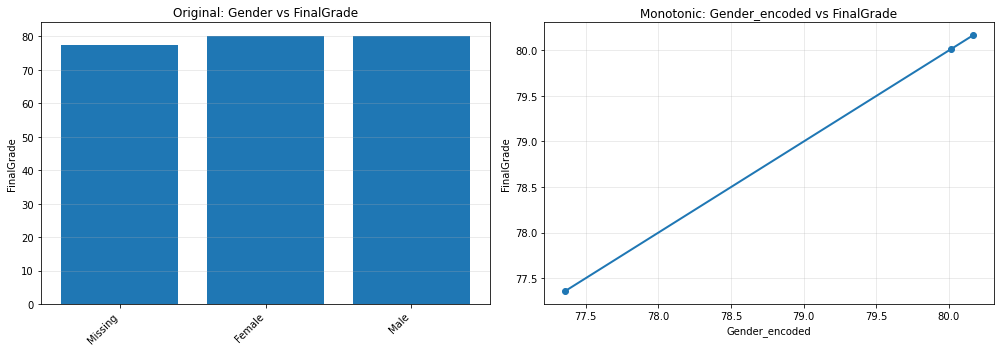


Target Encoding for: ParentalSupport

Mean FinalGrade by ParentalSupport:
  Medium: 80.6123
  Low: 80.0204
  High: 79.3922
  Missing: 78.7059


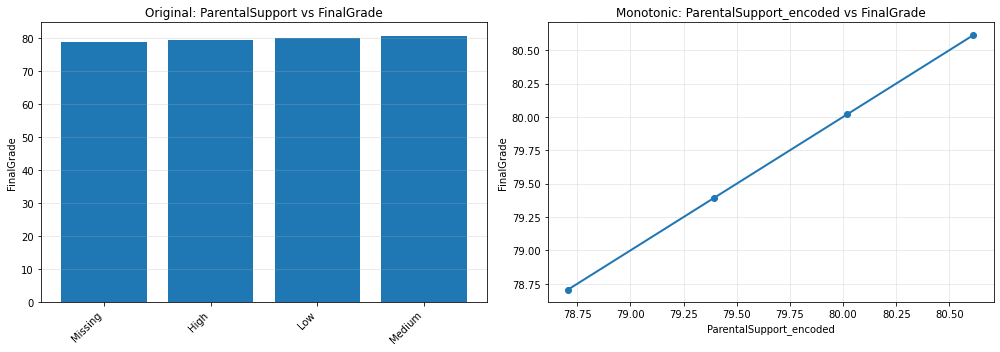


Target Encoding for: ExtracurricularActivities

Mean FinalGrade by ExtracurricularActivities:
  Missing: 81.3462
  0.0: 81.2520
  1.0: 80.0390
  2.0: 79.8713
  3.0: 78.6014


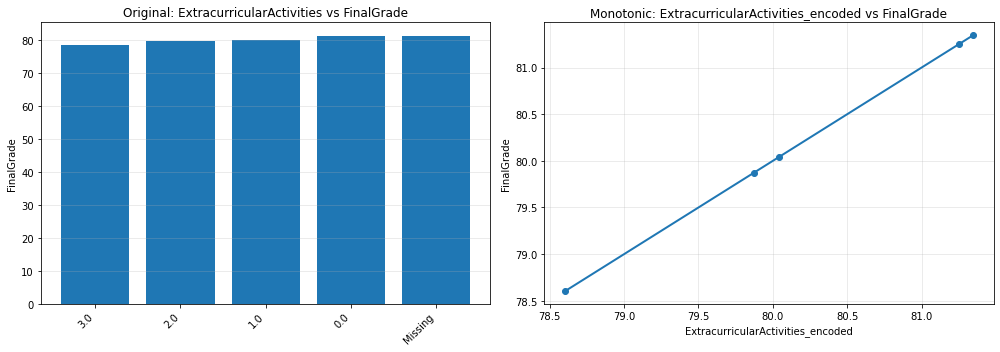

In [68]:
import matplotlib.pyplot as plt

# Apply target encoding to each categorical variable
for var in categorical_vars:
    print(f"\n{'='*60}")
    print(f"Target Encoding for: {var}")
    print(f"{'='*60}")
    
    # Calculate mean target value for each category (on training set only)
    target_means = X_train.join(y_train).groupby(var)[target].mean().to_dict()
    
    print(f"\nMean {target} by {var}:")
    for category, mean_val in sorted(target_means.items(), key=lambda x: x[1], reverse=True):
        print(f"  {category}: {mean_val:.4f}")
    
    # Apply encoding to train and test sets
    encoded_var_name = f"{var}_encoded"
    X_train[encoded_var_name] = X_train[var].map(target_means)
    X_test[encoded_var_name] = X_test[var].map(target_means)
    
    # Visualize original vs encoded relationship
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Original relationship
    original_means = X_train.join(y_train).groupby(var)[target].mean().sort_values()
    axes[0].bar(range(len(original_means)), original_means.values)
    axes[0].set_xticks(range(len(original_means)))
    axes[0].set_xticklabels(original_means.index, rotation=45, ha='right')
    axes[0].set_ylabel(target)
    axes[0].set_title(f'Original: {var} vs {target}')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Monotonic relationship after encoding
    encoded_means = X_train.join(y_train).groupby(encoded_var_name)[target].mean().sort_index()
    axes[1].plot(encoded_means.index.to_numpy(), encoded_means.values, marker='o', linewidth=2)
    axes[1].set_xlabel(f'{var}_encoded')
    axes[1].set_ylabel(target)
    axes[1].set_title(f'Monotonic: {var}_encoded vs {target}')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [69]:
X_train.head(10)

,Gender,ParentalSupport,ExtracurricularActivities,Gender_encoded,ParentalSupport_encoded,ExtracurricularActivities_encoded
243,Female,Medium,0.0,80.013652,80.612335,81.251969
336,Female,High,1.0,80.013652,79.392241,80.039024
747,Female,High,0.0,80.013652,79.392241,81.251969
227,Female,Low,3.0,80.013652,80.020408,78.601399
83,Female,Medium,3.0,80.013652,80.612335,78.601399
158,Male,High,2.0,80.166667,79.392241,79.871345
312,Male,High,3.0,80.166667,79.392241,78.601399
823,Female,Medium,3.0,80.013652,80.612335,78.601399
326,Male,High,1.0,80.166667,79.392241,80.039024
460,Male,High,3.0,80.166667,79.392241,78.601399


In [70]:
X_test.head(10)

,Gender,ParentalSupport,ExtracurricularActivities,Gender_encoded,ParentalSupport_encoded,ExtracurricularActivities_encoded
870,Female,Medium,2.0,80.013652,80.612335,79.871345
498,Female,Missing,2.0,80.013652,78.705882,79.871345
369,Female,High,1.0,80.013652,79.392241,80.039024
930,Male,Missing,2.0,80.166667,78.705882,79.871345
961,Female,Medium,2.0,80.013652,80.612335,79.871345
277,Female,High,2.0,80.013652,79.392241,79.871345
230,Male,Low,1.0,80.166667,80.020408,80.039024
352,Male,Low,2.0,80.166667,80.020408,79.871345
91,Missing,Medium,1.0,77.354839,80.612335,80.039024
914,Male,Medium,0.0,80.166667,80.612335,81.251969


### Weight of evidence

**What is WOE?**
- WOE measures the strength of a categorical variable's relationship with a binary target
- Formula: `WOE = ln(P(target=1|category) / P(target=0|category))`
- Creates monotonic relationships suitable for logistic regression
- Commonly used in credit scoring and risk modeling

In [71]:
data5 = data.copy()

print("Dataset Shape:", data5.shape)
print("\nFirst 5 rows:")
data5.head()

Dataset Shape: (1000, 12)

First 5 rows:


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [72]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [73]:
# Examine categorical variables

print("\n1. Gender Distribution:")
print(data5['Gender'].value_counts(dropna=False))

print("\n2. Parental Support Distribution:")
print(data5['ParentalSupport'].value_counts(dropna=False))

print("\n3. Online Classes Taken Distribution:")
print(data5['Online Classes Taken'].value_counts(dropna=False))


1. Gender Distribution:
Gender
Male      501
Female    451
NaN        48
Name: count, dtype: int64

2. Parental Support Distribution:
ParentalSupport
High      345
Medium    328
Low       305
NaN        22
Name: count, dtype: int64

3. Online Classes Taken Distribution:
Online Classes Taken
True     495
False    480
NaN       25
Name: count, dtype: int64


TARGET VARIABLE (FinalGrade) ANALYSIS

Statistics:
count    960.000000
mean      80.030208
std        9.493652
min       62.000000
25%       72.000000
50%       80.000000
75%       88.000000
max       92.000000
Name: FinalGrade, dtype: float64

Distribution:


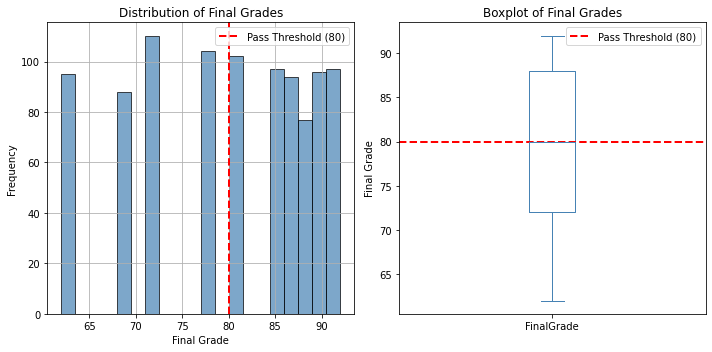

In [74]:
# Examine the target variable (FinalGrade)
print("TARGET VARIABLE (FinalGrade) ANALYSIS")
print("="*60)
print("\nStatistics:")
print(data5['FinalGrade'].describe())

print("\nDistribution:")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data5['FinalGrade'].hist(bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.title('Distribution of Final Grades')
plt.axvline(x=80, color='red', linestyle='--', linewidth=2, label='Pass Threshold (80)')
plt.legend()

plt.subplot(1, 2, 2)
data5['FinalGrade'].plot(kind='box', color='steelblue')
plt.ylabel('Final Grade')
plt.title('Boxplot of Final Grades')
plt.axhline(y=80, color='red', linestyle='--', linewidth=2, label='Pass Threshold (80)')
plt.legend()

plt.tight_layout()
plt.show()

###### Creating binary target variable

WOE encoding requires a **binary target** (0/1). We'll create a `Pass` variable:
- Pass = 1 if FinalGrade >= 80
- Pass = 0 if FinalGrade < 80

Binary Target Variable Created!

Target Distribution:
Pass
1    563
0    437
Name: count, dtype: int64

Pass Rate: 56.30%
Fail Rate: 43.70%


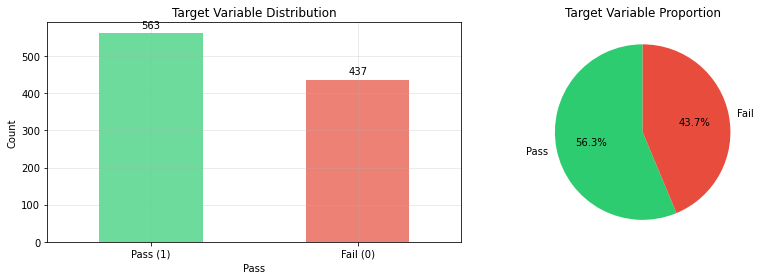

In [75]:
# Create binary target variable
data5['Pass'] = (data5['FinalGrade'] >= 80).astype(int)

print("Binary Target Variable Created!")
print("="*60)
print("\nTarget Distribution:")
print(data5['Pass'].value_counts())
print(f"\nPass Rate: {data5['Pass'].mean():.2%}")
print(f"Fail Rate: {(1 - data5['Pass'].mean()):.2%}")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
ax1 = axes[0]
data5['Pass'].value_counts().plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'], alpha=0.7)
ax1.set_xticklabels(['Pass (1)', 'Fail (0)'], rotation=0)
ax1.set_ylabel('Count')
ax1.set_title('Target Variable Distribution')
ax1.grid(True, alpha=0.3)

# Add value labels
for container in ax1.containers:
    ax1.bar_label(container, padding=3)

# Pie chart
ax2 = axes[1]
data5['Pass'].value_counts().plot(kind='pie', ax=ax2, colors=['#2ecc71', '#e74c3c'], 
                                autopct='%1.1f%%', startangle=90, labels=['Pass', 'Fail'])
ax2.set_ylabel('')
ax2.set_title('Target Variable Proportion')

plt.tight_layout()
plt.show()

In [76]:
# Remove rows with missing target
print(f"Original dataset: {len(data5)} rows")
data5 = data5[data5['Pass'].notna()].copy()
print(f"After removing missing targets: {len(data5)} rows")

Original dataset: 1000 rows
After removing missing targets: 1000 rows


In [77]:
# Split into train and test sets (80/20 split with stratification)
train_df, test_df = train_test_split(
    data5, 
    test_size=0.2, 
    random_state=42, 
    stratify=data5['Pass']
)

print("Train-Test Split Summary")
print("="*60)
print(f"Training set size: {len(train_df)} ({len(train_df)/len(data5)*100:.1f}%)")
print(f"Test set size: {len(test_df)} ({len(test_df)/len(data5)*100:.1f}%)")

print("\nTarget distribution in train set:")
print(train_df['Pass'].value_counts())
print(f"Pass rate: {train_df['Pass'].mean():.2%}")

print("\nTarget distribution in test set:")
print(test_df['Pass'].value_counts())
print(f"Pass rate: {test_df['Pass'].mean():.2%}")

Train-Test Split Summary
Training set size: 800 (80.0%)
Test set size: 200 (20.0%)

Target distribution in train set:
Pass
1    450
0    350
Name: count, dtype: int64
Pass rate: 56.25%

Target distribution in test set:
Pass
1    113
0     87
Name: count, dtype: int64
Pass rate: 56.50%


In [78]:
# Manual WOE calculation for Gender
print("MANUAL WOE CALCULATION FOR GENDER")
print("="*80)

# Step 1: Calculate pass rate by gender
gender_pass_rate = train_df.groupby('Gender')['Pass'].mean()
print("\nStep 1: Pass Rate by Gender")
print(gender_pass_rate)

# Step 2: Create a comprehensive statistics table
gender_stats = train_df.groupby('Gender')['Pass'].agg(['sum', 'count'])
gender_stats.columns = ['Passed', 'Total']
gender_stats['Failed'] = gender_stats['Total'] - gender_stats['Passed']
gender_stats['P(Pass)'] = gender_stats['Passed'] / gender_stats['Total']
gender_stats['P(Fail)'] = gender_stats['Failed'] / gender_stats['Total']

print("\nStep 2: Complete Statistics Table")
print(gender_stats)

# Step 3: Calculate WOE
gender_stats['WOE'] = np.log(gender_stats['P(Pass)'] / gender_stats['P(Fail)'])

print("\nStep 3: WOE Values")
print(gender_stats[['WOE']])

# Step 4: Calculate IV
gender_stats['IV'] = (gender_stats['P(Pass)'] - gender_stats['P(Fail)']) * gender_stats['WOE']
total_iv = gender_stats['IV'].sum()

print("\nStep 4: Information Value (IV)")
print(gender_stats[['IV']])
print(f"\nTotal IV for Gender: {total_iv:.6f}")

# Interpret IV
if total_iv < 0.02:
    interpretation = "Not useful for prediction"
elif total_iv < 0.1:
    interpretation = "Weak predictive power"
elif total_iv < 0.3:
    interpretation = "Medium predictive power"
elif total_iv < 0.5:
    interpretation = "Strong predictive power"
else:
    interpretation = "Suspicious (may be overfitting)"

print(f"IV Interpretation: {interpretation}")

print("\n" + "="*80)
print("FINAL STATISTICS TABLE")
print("="*80)
print(gender_stats)

MANUAL WOE CALCULATION FOR GENDER

Step 1: Pass Rate by Gender
Gender
Female    0.559557
Male      0.562963
Name: Pass, dtype: float64

Step 2: Complete Statistics Table
        Passed  Total  Failed   P(Pass)   P(Fail)
Gender                                           
Female     202    361     159  0.559557  0.440443
Male       228    405     177  0.562963  0.437037

Step 3: WOE Values
             WOE
Gender          
Female  0.239363
Male    0.253196

Step 4: Information Value (IV)
              IV
Gender          
Female  0.028511
Male    0.031884

Total IV for Gender: 0.060395
IV Interpretation: Weak predictive power

FINAL STATISTICS TABLE
        Passed  Total  Failed   P(Pass)   P(Fail)       WOE        IV
Gender                                                               
Female     202    361     159  0.559557  0.440443  0.239363  0.028511
Male       228    405     177  0.562963  0.437037  0.253196  0.031884


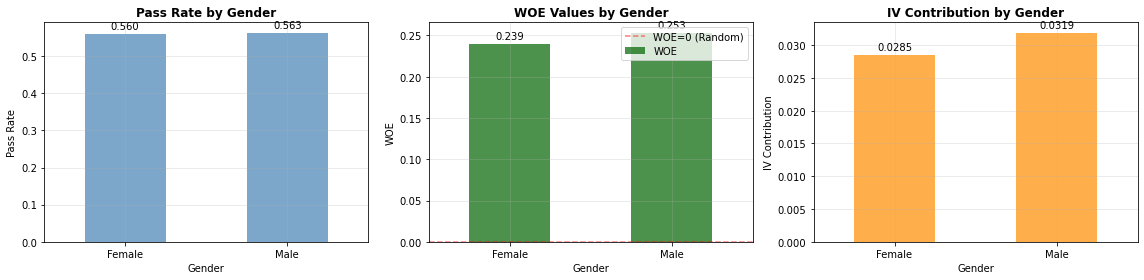


💡 Key Insight: Both genders have positive WOE (both favor passing), 
with Male showing slightly higher WOE (0.253) 
than Female (0.239).


In [79]:
# Visualize the WOE concept
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Plot 1: Pass rate by gender
ax1 = axes[0]
gender_pass_rate.plot(kind='bar', ax=ax1, color='steelblue', alpha=0.7)
ax1.set_title('Pass Rate by Gender', fontweight='bold')
ax1.set_ylabel('Pass Rate')
ax1.set_xlabel('Gender')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.grid(True, alpha=0.3)
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.3f', padding=3)

# Plot 2: WOE values
ax2 = axes[1]
gender_stats['WOE'].plot(kind='bar', ax=ax2, color='darkgreen', alpha=0.7)
ax2.set_title('WOE Values by Gender', fontweight='bold')
ax2.set_ylabel('WOE')
ax2.set_xlabel('Gender')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='WOE=0 (Random)')
ax2.grid(True, alpha=0.3)
ax2.legend()
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.3f', padding=3)

# Plot 3: IV contribution
ax3 = axes[2]
gender_stats['IV'].plot(kind='bar', ax=ax3, color='darkorange', alpha=0.7)
ax3.set_title('IV Contribution by Gender', fontweight='bold')
ax3.set_ylabel('IV Contribution')
ax3.set_xlabel('Gender')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.grid(True, alpha=0.3)
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.4f', padding=3)

plt.tight_layout()
plt.show()

print(f"\n💡 Key Insight: Both genders have positive WOE (both favor passing), ")
print(f"with Male showing slightly higher WOE ({gender_stats.loc['Male', 'WOE']:.3f}) ")
print(f"than Female ({gender_stats.loc['Female', 'WOE']:.3f}).")

In [80]:
def calculate_woe(train_data, test_data, variable, target='Pass'):
    """
    Calculate Weight of Evidence for a categorical variable
    
    Parameters:
    -----------
    train_data : DataFrame
        Training dataset
    test_data : DataFrame
        Test dataset
    variable : str
        Name of the categorical variable
    target : str
        Name of the binary target variable
    
    Returns:
    --------
    train_encoded : Series
        WOE encoded training data
    test_encoded : Series
        WOE encoded test data
    woe_df : DataFrame
        WOE statistics for each category
    woe_map : dict
        Mapping dictionary from category to WOE
    """
    
    # Remove missing values for this analysis
    train_clean = train_data[[variable, target]].dropna()
    
    # Calculate probability of target=1 and target=0 for each category
    prob_df = train_clean.groupby([variable])[target].agg(['sum', 'count'])
    prob_df['Passed'] = prob_df['sum'] / prob_df['count']
    prob_df['Failed'] = 1 - prob_df['Passed']
    
    # Handle zero probabilities (replace with small value to avoid log(0))
    prob_df.loc[prob_df['Passed'] == 0, 'Passed'] = 0.0001
    prob_df.loc[prob_df['Failed'] == 0, 'Failed'] = 0.0001
    
    # Calculate WOE: log(P(target=1) / P(target=0))
    prob_df['WOE'] = np.log(prob_df['Passed'] / prob_df['Failed'])
    
    # Calculate Information Value (IV) for each category
    prob_df['IV'] = (prob_df['Passed'] - prob_df['Failed']) * prob_df['WOE']
    
    # Create mapping dictionary
    woe_map = prob_df['WOE'].to_dict()
    
    # Apply WOE encoding
    train_encoded = train_data[variable].map(woe_map)
    test_encoded = test_data[variable].map(woe_map)
    
    # Prepare output dataframe
    woe_df = prob_df[['count', 'Passed', 'Failed', 'WOE', 'IV']].copy()
    woe_df.columns = ['Count', 'P(Pass)', 'P(Fail)', 'WOE', 'IV']
    
    return train_encoded, test_encoded, woe_df, woe_map

print("✓ WOE calculation function created successfully!")
print("\nFunction: calculate_woe()")
print("Purpose: Calculate WOE and IV for any categorical variable")
print("Returns: Encoded train/test data, statistics table, and WOE mapping")

✓ WOE calculation function created successfully!

Function: calculate_woe()
Purpose: Calculate WOE and IV for any categorical variable
Returns: Encoded train/test data, statistics table, and WOE mapping


In [81]:
# Define categorical variables to encode
categorical_vars = ['Gender', 'ParentalSupport', 'Online Classes Taken']

# Initialize storage for results
woe_results = {}
woe_maps = {}

print("="*80)
print("APPLYING WOE ENCODING TO ALL CATEGORICAL VARIABLES")
print("="*80)
print(f"\nVariables to encode: {categorical_vars}")
print(f"Number of variables: {len(categorical_vars)}")

APPLYING WOE ENCODING TO ALL CATEGORICAL VARIABLES

Variables to encode: ['Gender', 'ParentalSupport', 'Online Classes Taken']
Number of variables: 3


In [82]:
# Apply WOE encoding to Gender
var = 'Gender'
print(f"\n{'='*80}")
print(f"Encoding Variable: {var}")
print(f"{'='*80}")

train_encoded, test_encoded, woe_df, woe_map = calculate_woe(train_df, test_df, var)

# Store results
woe_results[var] = woe_df
woe_maps[var] = woe_map

# Add encoded columns to dataframes
train_df[f'{var}_WOE'] = train_encoded
test_df[f'{var}_WOE'] = test_encoded

# Display WOE statistics
print(f"\nWOE Statistics for {var}:")
print(woe_df)

# Calculate total Information Value
total_iv = woe_df['IV'].sum()
print(f"\nTotal Information Value (IV): {total_iv:.6f}")

# Interpret IV
if total_iv < 0.02:
    iv_interpretation = "Not useful for prediction"
elif total_iv < 0.1:
    iv_interpretation = "Weak predictive power"
elif total_iv < 0.3:
    iv_interpretation = "Medium predictive power"
elif total_iv < 0.5:
    iv_interpretation = "Strong predictive power"
else:
    iv_interpretation = "Suspicious (may be overfitting)"

print(f"IV Interpretation: {iv_interpretation}")
print(f"\n✓ {var} encoded successfully!")


Encoding Variable: Gender

WOE Statistics for Gender:
        Count   P(Pass)   P(Fail)       WOE        IV
Gender                                               
Female    361  0.559557  0.440443  0.239363  0.028511
Male      405  0.562963  0.437037  0.253196  0.031884

Total Information Value (IV): 0.060395
IV Interpretation: Weak predictive power

✓ Gender encoded successfully!


In [83]:
# Apply WOE encoding to ParentalSupport
var = 'ParentalSupport'
print(f"\n{'='*80}")
print(f"Encoding Variable: {var}")
print(f"{'='*80}")

train_encoded, test_encoded, woe_df, woe_map = calculate_woe(train_df, test_df, var)

# Store results
woe_results[var] = woe_df
woe_maps[var] = woe_map

# Add encoded columns to dataframes
train_df[f'{var}_WOE'] = train_encoded
test_df[f'{var}_WOE'] = test_encoded

# Display WOE statistics
print(f"\nWOE Statistics for {var}:")
print(woe_df)

# Calculate total Information Value
total_iv = woe_df['IV'].sum()
print(f"\nTotal Information Value (IV): {total_iv:.6f}")

# Interpret IV
if total_iv < 0.02:
    iv_interpretation = "Not useful for prediction"
elif total_iv < 0.1:
    iv_interpretation = "Weak predictive power"
elif total_iv < 0.3:
    iv_interpretation = "Medium predictive power"
elif total_iv < 0.5:
    iv_interpretation = "Strong predictive power"
else:
    iv_interpretation = "Suspicious (may be overfitting)"

print(f"IV Interpretation: {iv_interpretation}")

# Highlight unexpected finding
print("\n⚠️  UNEXPECTED FINDING!")
print("High parental support has the LOWEST pass rate (and lowest WOE)")
print("This counterintuitive result warrants further investigation.")
print(f"\n✓ {var} encoded successfully!")


Encoding Variable: ParentalSupport

WOE Statistics for ParentalSupport:
                 Count   P(Pass)   P(Fail)       WOE        IV
ParentalSupport                                               
High               279  0.551971  0.448029  0.208639  0.021686
Low                246  0.569106  0.430894  0.278203  0.038451
Medium             256  0.570312  0.429688  0.283126  0.039815

Total Information Value (IV): 0.099952
IV Interpretation: Weak predictive power

⚠️  UNEXPECTED FINDING!
High parental support has the LOWEST pass rate (and lowest WOE)
This counterintuitive result warrants further investigation.

✓ ParentalSupport encoded successfully!


In [84]:
# Apply WOE encoding to Online Classes Taken
var = 'Online Classes Taken'
print(f"\n{'='*80}")
print(f"Encoding Variable: {var}")
print(f"{'='*80}")

train_encoded, test_encoded, woe_df, woe_map = calculate_woe(train_df, test_df, var)

# Store results
woe_results[var] = woe_df
woe_maps[var] = woe_map

# Add encoded columns to dataframes
train_df[f'{var}_WOE'] = train_encoded
test_df[f'{var}_WOE'] = test_encoded

# Display WOE statistics
print(f"\nWOE Statistics for {var}:")
print(woe_df)

# Calculate total Information Value
total_iv = woe_df['IV'].sum()
print(f"\nTotal Information Value (IV): {total_iv:.6f}")

# Interpret IV
if total_iv < 0.02:
    iv_interpretation = "Not useful for prediction"
elif total_iv < 0.1:
    iv_interpretation = "Weak predictive power"
elif total_iv < 0.3:
    iv_interpretation = "Medium predictive power"
elif total_iv < 0.5:
    iv_interpretation = "Strong predictive power"
else:
    iv_interpretation = "Suspicious (may be overfitting)"

print(f"IV Interpretation: {iv_interpretation}")
print("\n💡 Insight: Students taking online classes show slightly higher pass rate.")
print(f"✓ {var} encoded successfully!")


Encoding Variable: Online Classes Taken

WOE Statistics for Online Classes Taken:
                      Count   P(Pass)   P(Fail)       WOE        IV
Online Classes Taken                                               
False                   386  0.549223  0.450777  0.197531  0.019446
True                    395  0.572152  0.427848  0.290636  0.041940

Total Information Value (IV): 0.061386
IV Interpretation: Weak predictive power

💡 Insight: Students taking online classes show slightly higher pass rate.
✓ Online Classes Taken encoded successfully!


In [85]:
# Create summary report
print("\n" + "="*80)
print("SUMMARY: INFORMATION VALUE (IV) FOR ALL VARIABLES")
print("="*80)

summary_data = []
for var in categorical_vars:
    woe_df = woe_results[var]
    total_iv = woe_df['IV'].sum()
    n_categories = len(woe_df)
    
    if total_iv < 0.02:
        power = "Not Useful"
    elif total_iv < 0.1:
        power = "Weak"
    elif total_iv < 0.3:
        power = "Medium"
    elif total_iv < 0.5:
        power = "Strong"
    else:
        power = "Suspicious"
    
    summary_data.append({
        'Variable': var,
        'Categories': n_categories,
        'Total IV': f"{total_iv:.6f}",
        'Predictive Power': power
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + summary_df.to_string(index=False))

print("\n" + "="*80)
print("KEY FINDINGS:")
print("="*80)
print("1. All categorical variables show WEAK predictive power (IV < 0.10)")
print("2. ParentalSupport has the highest IV (0.100), just at weak/medium threshold")
print("3. Gender and Online Classes have similar low IV scores (~0.06)")
print("4. These features alone are insufficient for strong predictions")
print("5. Recommendation: Add continuous features for better model performance")


SUMMARY: INFORMATION VALUE (IV) FOR ALL VARIABLES

            Variable  Categories Total IV Predictive Power
              Gender           2 0.060395             Weak
     ParentalSupport           3 0.099952             Weak
Online Classes Taken           2 0.061386             Weak

KEY FINDINGS:
1. All categorical variables show WEAK predictive power (IV < 0.10)
2. ParentalSupport has the highest IV (0.100), just at weak/medium threshold
3. Gender and Online Classes have similar low IV scores (~0.06)
4. These features alone are insufficient for strong predictions
5. Recommendation: Add continuous features for better model performance


In [86]:
# Display sample of WOE encoded data
print("\n" + "="*80)
print("SAMPLE OF WOE ENCODED DATA (First 10 rows)")
print("="*80)

display_cols = ['Gender', 'Gender_WOE', 
                'ParentalSupport', 'ParentalSupport_WOE', 
                'Online Classes Taken', 'Online Classes Taken_WOE', 
                'Pass']

print("\nTraining Set:")
train_df[display_cols].head(10)


SAMPLE OF WOE ENCODED DATA (First 10 rows)

Training Set:


,Gender,Gender_WOE,ParentalSupport,ParentalSupport_WOE,Online Classes Taken,Online Classes Taken_WOE,Pass
437,Male,0.253196,Low,0.278203,False,0.197531,1
217,Female,0.239363,High,0.208639,False,0.197531,0
952,Male,0.253196,High,0.208639,True,0.290636,1
268,Male,0.253196,Medium,0.283126,False,0.197531,1
486,Male,0.253196,Medium,0.283126,False,0.197531,0
768,Male,0.253196,Medium,0.283126,False,0.197531,1
828,Male,0.253196,High,0.208639,NaN,NaN,0
915,Male,0.253196,High,0.208639,False,0.197531,1
366,Female,0.239363,Low,0.278203,False,0.197531,1
861,Male,0.253196,Low,0.278203,True,0.290636,1


✓ Visualization saved: woe_encoding_visualization.png


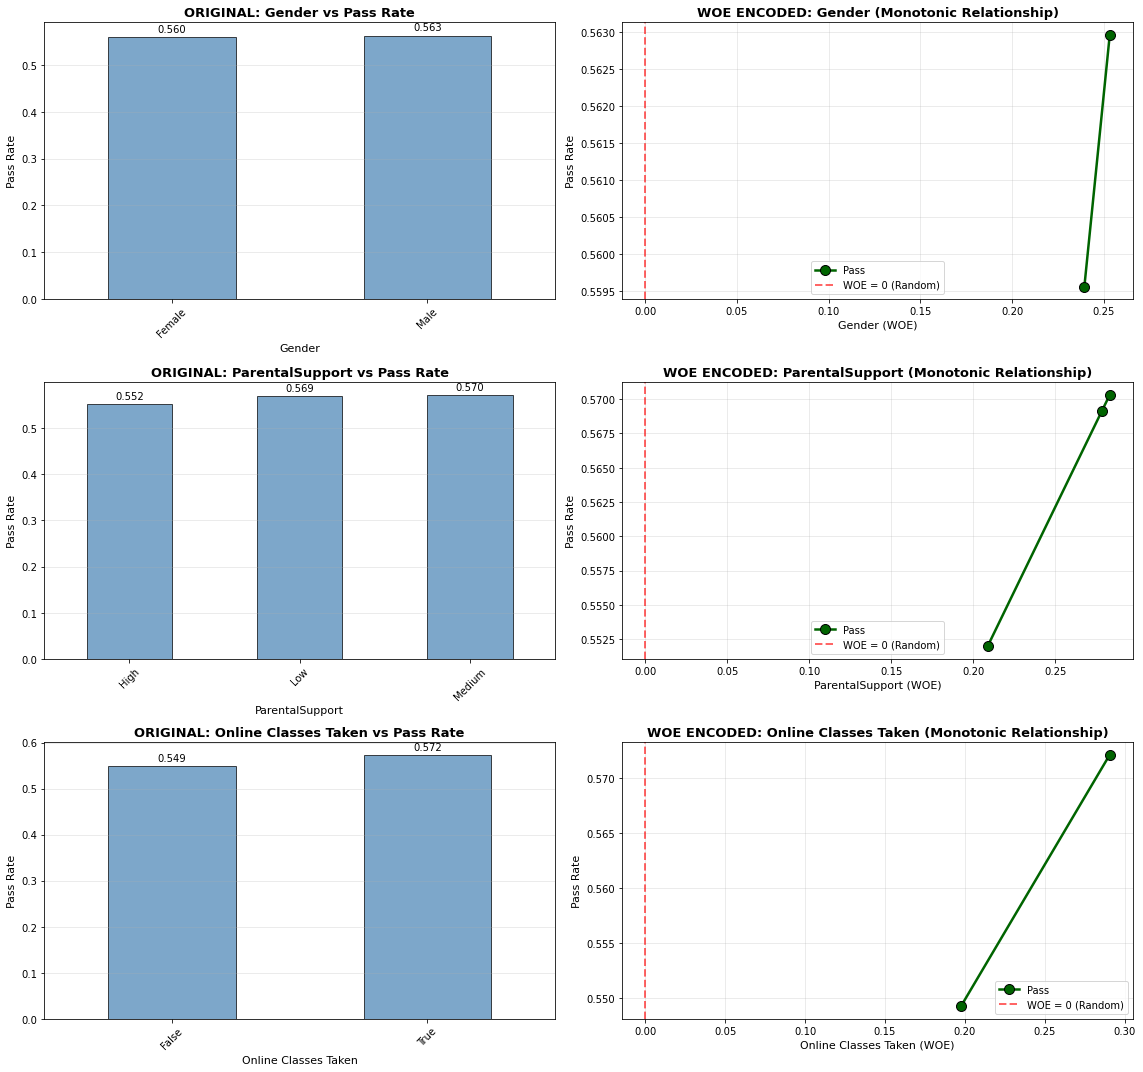


💡 Key Observation:
The right panels show MONOTONIC relationships - as WOE increases, pass rate increases.
This is the power of WOE encoding: it creates linear relationships suitable for logistic regression!


In [87]:
# Create before/after comparison for all variables
fig, axes = plt.subplots(len(categorical_vars), 2, figsize=(16, 5*len(categorical_vars)))

for idx, var in enumerate(categorical_vars):
    # Original relationship
    ax1 = axes[idx, 0]
    original_relation = train_df.groupby([var])['Pass'].mean().sort_index()
    original_relation.plot(kind='bar', ax=ax1, color='steelblue', alpha=0.7, edgecolor='black')
    ax1.set_title(f'ORIGINAL: {var} vs Pass Rate', fontsize=13, fontweight='bold')
    ax1.set_ylabel('Pass Rate', fontsize=11)
    ax1.set_xlabel(var, fontsize=11)
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.3f', padding=3)
    
    # WOE encoded relationship (monotonic)
    ax2 = axes[idx, 1]
    woe_col = f'{var}_WOE'
    woe_relation = train_df.groupby([woe_col])['Pass'].mean().sort_index()
    woe_relation.plot(kind='line', ax=ax2, marker='o', color='darkgreen', 
                     linewidth=2.5, markersize=10, markeredgecolor='black')
    ax2.set_title(f'WOE ENCODED: {var} (Monotonic Relationship)', 
                 fontsize=13, fontweight='bold')
    ax2.set_ylabel('Pass Rate', fontsize=11)
    ax2.set_xlabel(f'{var} (WOE)', fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    # Add reference line at WOE = 0
    ax2.axvline(x=0, color='red', linestyle='--', alpha=0.6, linewidth=2, 
               label='WOE = 0 (Random)')
    ax2.legend(fontsize=10)

plt.tight_layout()
print("✓ Visualization saved: woe_encoding_visualization.png")
plt.show()

print("\n💡 Key Observation:")
print("The right panels show MONOTONIC relationships - as WOE increases, pass rate increases.")
print("This is the power of WOE encoding: it creates linear relationships suitable for logistic regression!")

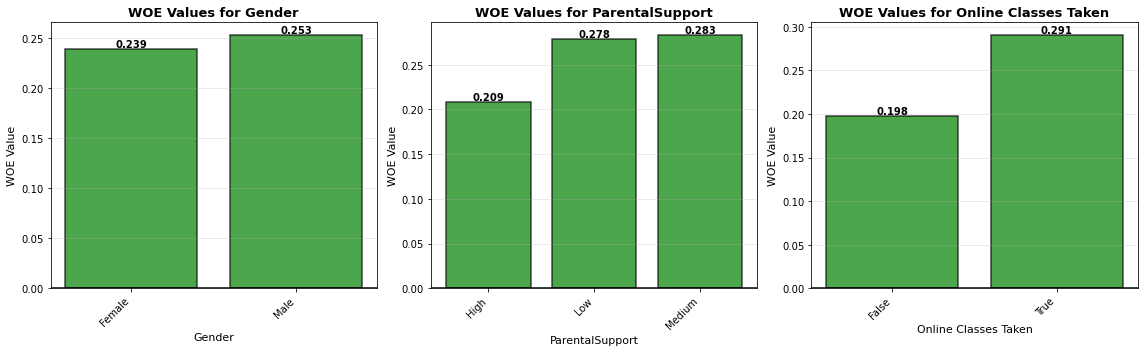


💡 WOE Interpretation:
• Green bars (positive WOE): Category favors PASSING
• Red bars (negative WOE): Category favors FAILING
• Zero line: No influence (random)

✓ All categories in this dataset have POSITIVE WOE (all favor passing)!


In [88]:
# Create WOE distribution plots
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(16, 5))

for idx, var in enumerate(categorical_vars):
    ax = axes[idx]
    woe_df = woe_results[var]
    
    # Create bar plot of WOE values
    categories = woe_df.index.tolist()
    woe_values = woe_df['WOE'].values
    colors = ['green' if val > 0 else 'red' for val in woe_values]
    
    bars = ax.bar(range(len(categories)), woe_values, color=colors, alpha=0.7, 
                  edgecolor='black', linewidth=1.5)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, rotation=45, ha='right')
    ax.set_ylabel('WOE Value', fontsize=11)
    ax.set_xlabel(var, fontsize=11)
    ax.set_title(f'WOE Values for {var}', fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, woe_values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.3f}',
                ha='center', va='bottom' if val > 0 else 'top', 
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 WOE Interpretation:")
print("• Green bars (positive WOE): Category favors PASSING")
print("• Red bars (negative WOE): Category favors FAILING")
print("• Zero line: No influence (random)")
print("\n✓ All categories in this dataset have POSITIVE WOE (all favor passing)!")